In [55]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows',None)
import numpy as np
import pprint
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier, XGBRegressor, plot_tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score, confusion_matrix, precision_recall_curve, auc, classification_report, f1_score, matthews_corrcoef, PrecisionRecallDisplay
import matplotlib.pyplot as plt
from math import sqrt
from scipy import stats
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
import graphviz
from sklearn.preprocessing import LabelEncoder

In [56]:
####################################################################################################
######################FILE GOES HERE!###############################################################
####################################################################################################
file = r"C:\Users\daith\OneDrive\Desktop\V2 FEMBA IT project working file.csv"

In [57]:
df = pd.read_csv(file)
df.shape
df.head()
df=df[0:74]

(75, 19)

,Irish,EU NonIreland,UK,US,NonEU NonUS,Age,30+,Male1,Rank UGI,Top 50,51-100,101-200,>200,NoRank,UG Business Studies,Grade,Grade 1st YN,Number of years,Accepted position
0,0,1,1,0,0,45,1,1,1,1,0,0,0,0,1,1,1,4,0
1,0,0,0,1,0,30,1,0,1,1,0,0,0,0,0,1,1,5,0
2,0,1,1,0,0,44,1,1,3,1,0,0,0,0,1,2,0,4,1
3,0,1,1,0,0,29,0,1,3,1,0,0,0,0,0,2,0,4,0
4,0,0,0,1,0,27,0,1,3,1,0,0,0,0,1,2,0,3,0


In [58]:
####################################################################################################
######################HEADER OF THE COLUMN THAT YOU ARE TRYING TO TEST GOES HERE!###################
####################################################################################################
predictionColumn = "Accepted position"

In [59]:
X = df.drop(columns=predictionColumn)
y=df[predictionColumn]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
y_true = np.array(y_test)

In [60]:
le = LabelEncoder()
y_train = le.fit_transform(y_train)

model = XGBClassifier()
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [61]:
####################################################################################################
######################OUTPUTS ACCURACY OF MODEL#####################################################
####################################################################################################
"ACCURACY OF MODEL:"
model.score(X_test, y_test)*100
"PREDICTION FOR 20% OF DATA"
model.predict(X_test)
"ACTUAL ANSWERS FOR THE SAME DATA"
y_true
"PROBABILITY FOR EACH OF THE 20%"
model.predict_proba(X_test)

'ACCURACY OF MODEL:'

73.33333333333333

'PREDICTION FOR 20% OF DATA'

array([0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0])

'ACTUAL ANSWERS FOR THE SAME DATA'

array([1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1], dtype=int64)

'PROBABILITY FOR EACH OF THE 20%'

array([[0.96143377, 0.03856625],
       [0.15443653, 0.8455635 ],
       [0.9211245 , 0.07887548],
       [0.77169174, 0.22830826],
       [0.634398  , 0.365602  ],
       [0.43020535, 0.56979465],
       [0.56584346, 0.43415657],
       [0.88999915, 0.11000086],
       [0.88431174, 0.11568824],
       [0.30456316, 0.69543684],
       [0.22378296, 0.77621704],
       [0.71641076, 0.28358924],
       [0.877182  , 0.12281799],
       [0.4678505 , 0.5321495 ],
       [0.756481  , 0.243519  ]], dtype=float32)

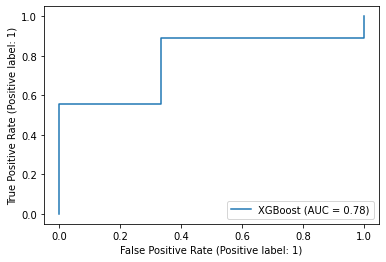

Thresholds: 
[1.8455634  0.8455635  0.5321495  0.365602   0.22830826 0.07887548
 0.03856625]


In [62]:
####################################################################################################
######################AUC ROC#######################################################################
####################################################################################################

pred_prob = model.predict_proba(X_test)
pred_prob = [point[1] for point in pred_prob]

from sklearn.metrics import roc_curve, RocCurveDisplay, roc_auc_score
fpr, tpr, thresholds = roc_curve(y_test, pred_prob)
#RocCurveDisplay(model, X_test, y_test, name=f"XGBoost{currentTest}")  
RocCurveDisplay.from_estimator(model, X_test, y_test, name="XGBoost")
plt.show()

print("Thresholds: ") 
print(thresholds)

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

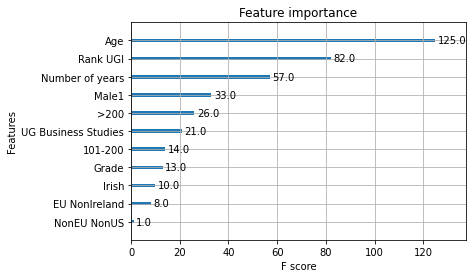

,Irish,EU NonIreland,UK,US,NonEU NonUS,Age,30+,Male1,Rank UGI,Top 50,51-100,101-200,>200,NoRank,UG Business Studies,Grade,Grade 1st YN,Number of years,Accepted position
0,0,1,1,0,0,45,1,1,1,1,0,0,0,0,1,1,1,4,0
1,0,0,0,1,0,30,1,0,1,1,0,0,0,0,0,1,1,5,0
2,0,1,1,0,0,44,1,1,3,1,0,0,0,0,1,2,0,4,1
3,0,1,1,0,0,29,0,1,3,1,0,0,0,0,0,2,0,4,0
4,0,0,0,1,0,27,0,1,3,1,0,0,0,0,1,2,0,3,0


In [63]:
####################################################################################################
######################FEATURE IMPORTANCE############################################################
####################################################################################################

from xgboost import plot_importance
plot_importance(model, max_num_features=40)
plt.show()
df.head()

<Axes: >

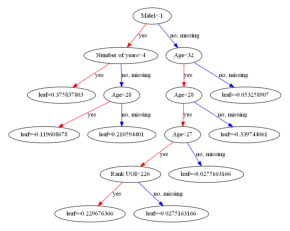

In [64]:
####################################################################################################
######################DECISION TREE#################################################################
####################################################################################################

plot_tree(model)
plt.show()